In [96]:
import json

# grab the happiness json and pull out some fields of interest in a simple CSV

with open('happiness.json') as f:
  happiness_json = json.load(f)

happiness_records = happiness_json['objects'];

with open("happiness.csv", "w") as f:
    f.write('Date,Type,Value\n')
    for happiness_record in happiness_records:
      f.write(happiness_record['date'] + ',Happiness,' + happiness_record['happiness'] + '\n')

In [97]:
import pandas as pd

# grab the bitcoin CSV 
bitcoin = pd.read_csv("bitcoin.csv")

# only take the columns we are interested in
bitcoin_df = pd.DataFrame(bitcoin, columns = ['Date', 'High', 'Low'])

# refactor the bitcoin data to allow multi plots
bitcoin_df = bitcoin_df.melt('Date', var_name='Type', value_name='Value')

# grab the happiness CSV 
happiness = pd.read_csv("happiness.csv")

# merge the data sets
happiness_df = pd.DataFrame(happiness)
happiness_df['Value'] = happiness_df['Value'].rolling(5, min_periods=1).mean()


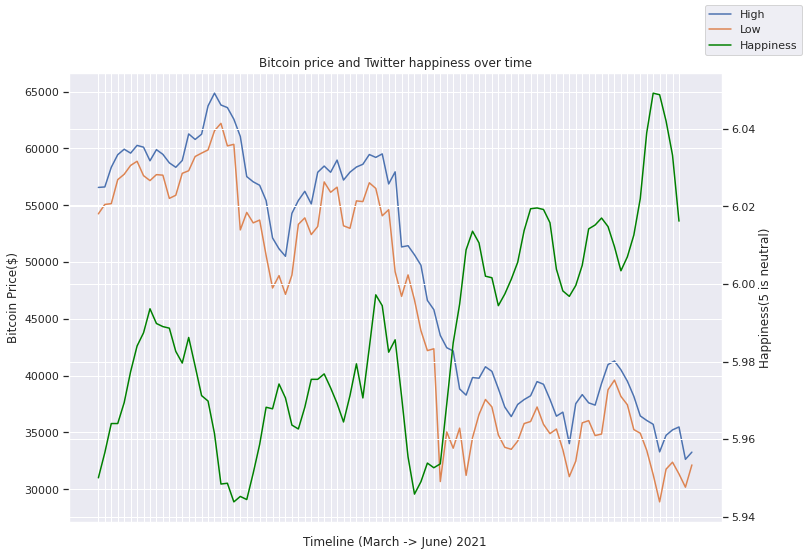

In [98]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams

# figure size in inches
rcParams['figure.figsize'] = 11.7,8.27


# setup the chart and load the data
sns.set_theme(style="darkgrid")

lp1 = sns.lineplot(data=bitcoin_df, x="Date", y="Value", hue="Type")
ax2 = lp1.twinx()
lp2 = sns.lineplot(data=happiness_df, x="Date", y="Value", hue="Type", ax=ax2, palette=['green'])
ax2.figure.legend()
lp1.set(title='Bitcoin price and Twitter happiness over time')
lp1.set(xlabel='Timeline (March -> June) 2021')
lp1.set(ylabel='Bitcoin Price($)')
lp1.set(xticklabels=[])
lp1.get_legend().remove()
lp2.set(ylabel='Happiness(5 is neutral)')
lp2.set(xticklabels=[])
lp2.get_legend().remove()
